# 1.1. OT Linear Progranming 

The goal of this notebook is to implement the lienar porgramming approach on a toy data set and time its implementation for different dataset sizes.

In [ ]:
import random
import numpy as np
import pandas as pd
from scipy import optimize
import seaborn as sns
from matplotlib import pyplot as plt
import time
np.random.seed(8)

In [ ]:
n_range = range(10,100)
m = 30

In [ ]:
def euclid_dist(point_a, point_b):
  return np.linalg.norm(np.subtract(point_a,point_b))

def distances(distr_1, distr_2):
  n, m = distr_1.shape[0], distr_2.shape[0]
  distances = np.zeros((n,m))
  for i in range(n):
    for j in range(m):
      distances[i][j] = euclid_dist(distr_1[i], distr_2[j])
  return distances

def matrix_of_constraints(n, m):
  A = np.zeros(shape=(n+m, n*m))
  for i in range(n):
    for j in range(m):
      A[i][i*m+j] = 1
  for i in range(m):
    for j in range(n):
      A[n+i][i+j*m] = 1
  return A

def vector_of_constraints(n, m): # equal masses for now
  ret = np.ones(n+m)
  ret[:n] *= 1/n
  ret[n:] *= 1/m
  return ret

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        rez = func(*args, **kwargs)
        print(f"For n = {n} the whole optimization took:", time.time() - start)
        return rez
    return wrapper

In [ ]:
@timer
def optimal_transport(n, m):
  distr_1 = np.random.random((n,2))
  distr_2 = 0.8 + np.random.random((m,2))
  distr_1_class = np.append(distr_1, np.zeros((n,1)), axis=1)
  distr_2_class = np.append(distr_2, np.ones((m,1)), axis=1)
  # equal masses
  distr_1_everything = np.append(distr_1_class, (1/n) * np.ones((n,1)), axis=1)
  distr_2_everything = np.append(distr_2_class, (1/m) * np.ones((m,1)), axis=1)

  c = distances(distr_1,distr_2).flatten()
  A_eq = matrix_of_constraints(n,m)
  b_eq = vector_of_constraints(n, m)
  bounds=tuple(zip([0]*(n*m),[1]*(n*m)))
  initial_guess = (1/(n*m)*np.ones((n, m))).flatten()

  start = time.time()
  res = optimize.linprog(c = c, A_eq = A_eq, b_eq = b_eq, bounds = bounds, x0 = initial_guess)
  time_only_linprog = time.time()-start
  
  return (res, time_only_linprog)


In [ ]:
rets = []
times_only_linprog = []
for n in n_range:
  (ret, time_only_linprog) = optimal_transport(n,m)
  rets.append(ret)
  times_only_linprog.append(time_only_linprog)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog.py:514: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


For n = 10 the whole optimization took: 0.3466181755065918
For n = 11 the whole optimization took: 0.2632331848144531
For n = 12 the whole optimization took: 0.33133578300476074
For n = 13 the whole optimization took: 0.4835479259490967
For n = 14 the whole optimization took: 0.4414076805114746
For n = 15 the whole optimization took: 0.5612912178039551
For n = 16 the whole optimization took: 0.7646560668945312
For n = 17 the whole optimization took: 0.760552167892456
For n = 18 the whole optimization took: 1.0194165706634521
For n = 19 the whole optimization took: 1.0282056331634521
For n = 20 the whole optimization took: 1.1977717876434326
For n = 21 the whole optimization took: 1.358445167541504
For n = 22 the whole optimization took: 1.5247302055358887
For n = 23 the whole optimization took: 1.6375055313110352
For n = 24 the whole optimization took: 1.8802998065948486
For n = 25 the whole optimization took: 2.093764305114746
For n = 26 the whole optimization took: 2.270883083343506


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

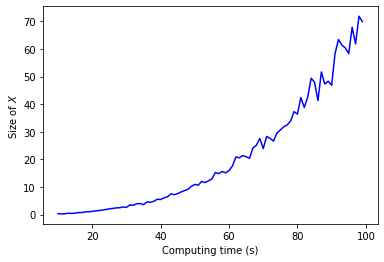

In [ ]:
from google.colab import files
plt.plot(n_range, times_only_linprog,color='blue')
plt.xlabel('Computing time (s)')
plt.ylabel('Size of $X$')
plt.savefig('time.jpg')
files.download('time.jpg')


Optimal Transport linear solution for n=m=20

In [ ]:
n, m = 20, 20
distr_1 = np.random.random((n,2))
distr_2 = 0.8 + np.random.random((m,2))
distr_1_class = np.append(distr_1, np.zeros((n,1)), axis=1)
distr_2_class = np.append(distr_2, np.ones((m,1)), axis=1)
# equal masses
distr_1_everything = np.append(distr_1_class, (1/n) * np.ones((n,1)), axis=1)
distr_2_everything = np.append(distr_2_class, (1/m) * np.ones((m,1)), axis=1)

c = distances(distr_1,distr_2).flatten()
A_eq = matrix_of_constraints(n,m)
b_eq = vector_of_constraints(n, m)
bounds=tuple(zip([0]*(n*m),[1]*(n*m)))
initial_guess = (1/(n*m)*np.ones((n, m))).flatten()

res = optimize.linprog(c = c, A_eq = A_eq, b_eq = b_eq, bounds = bounds, x0 = initial_guess)
optimal_transport_transition = np.round_(res.x.reshape((n,m)), decimals=4)
optimal_transport_everything1 = np.append(distr_1_everything, optimal_transport_transition, axis=1)
optimal_transport_everything2 = np.append(distr_2_everything, optimal_transport_transition.T, axis=1)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog.py:514: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


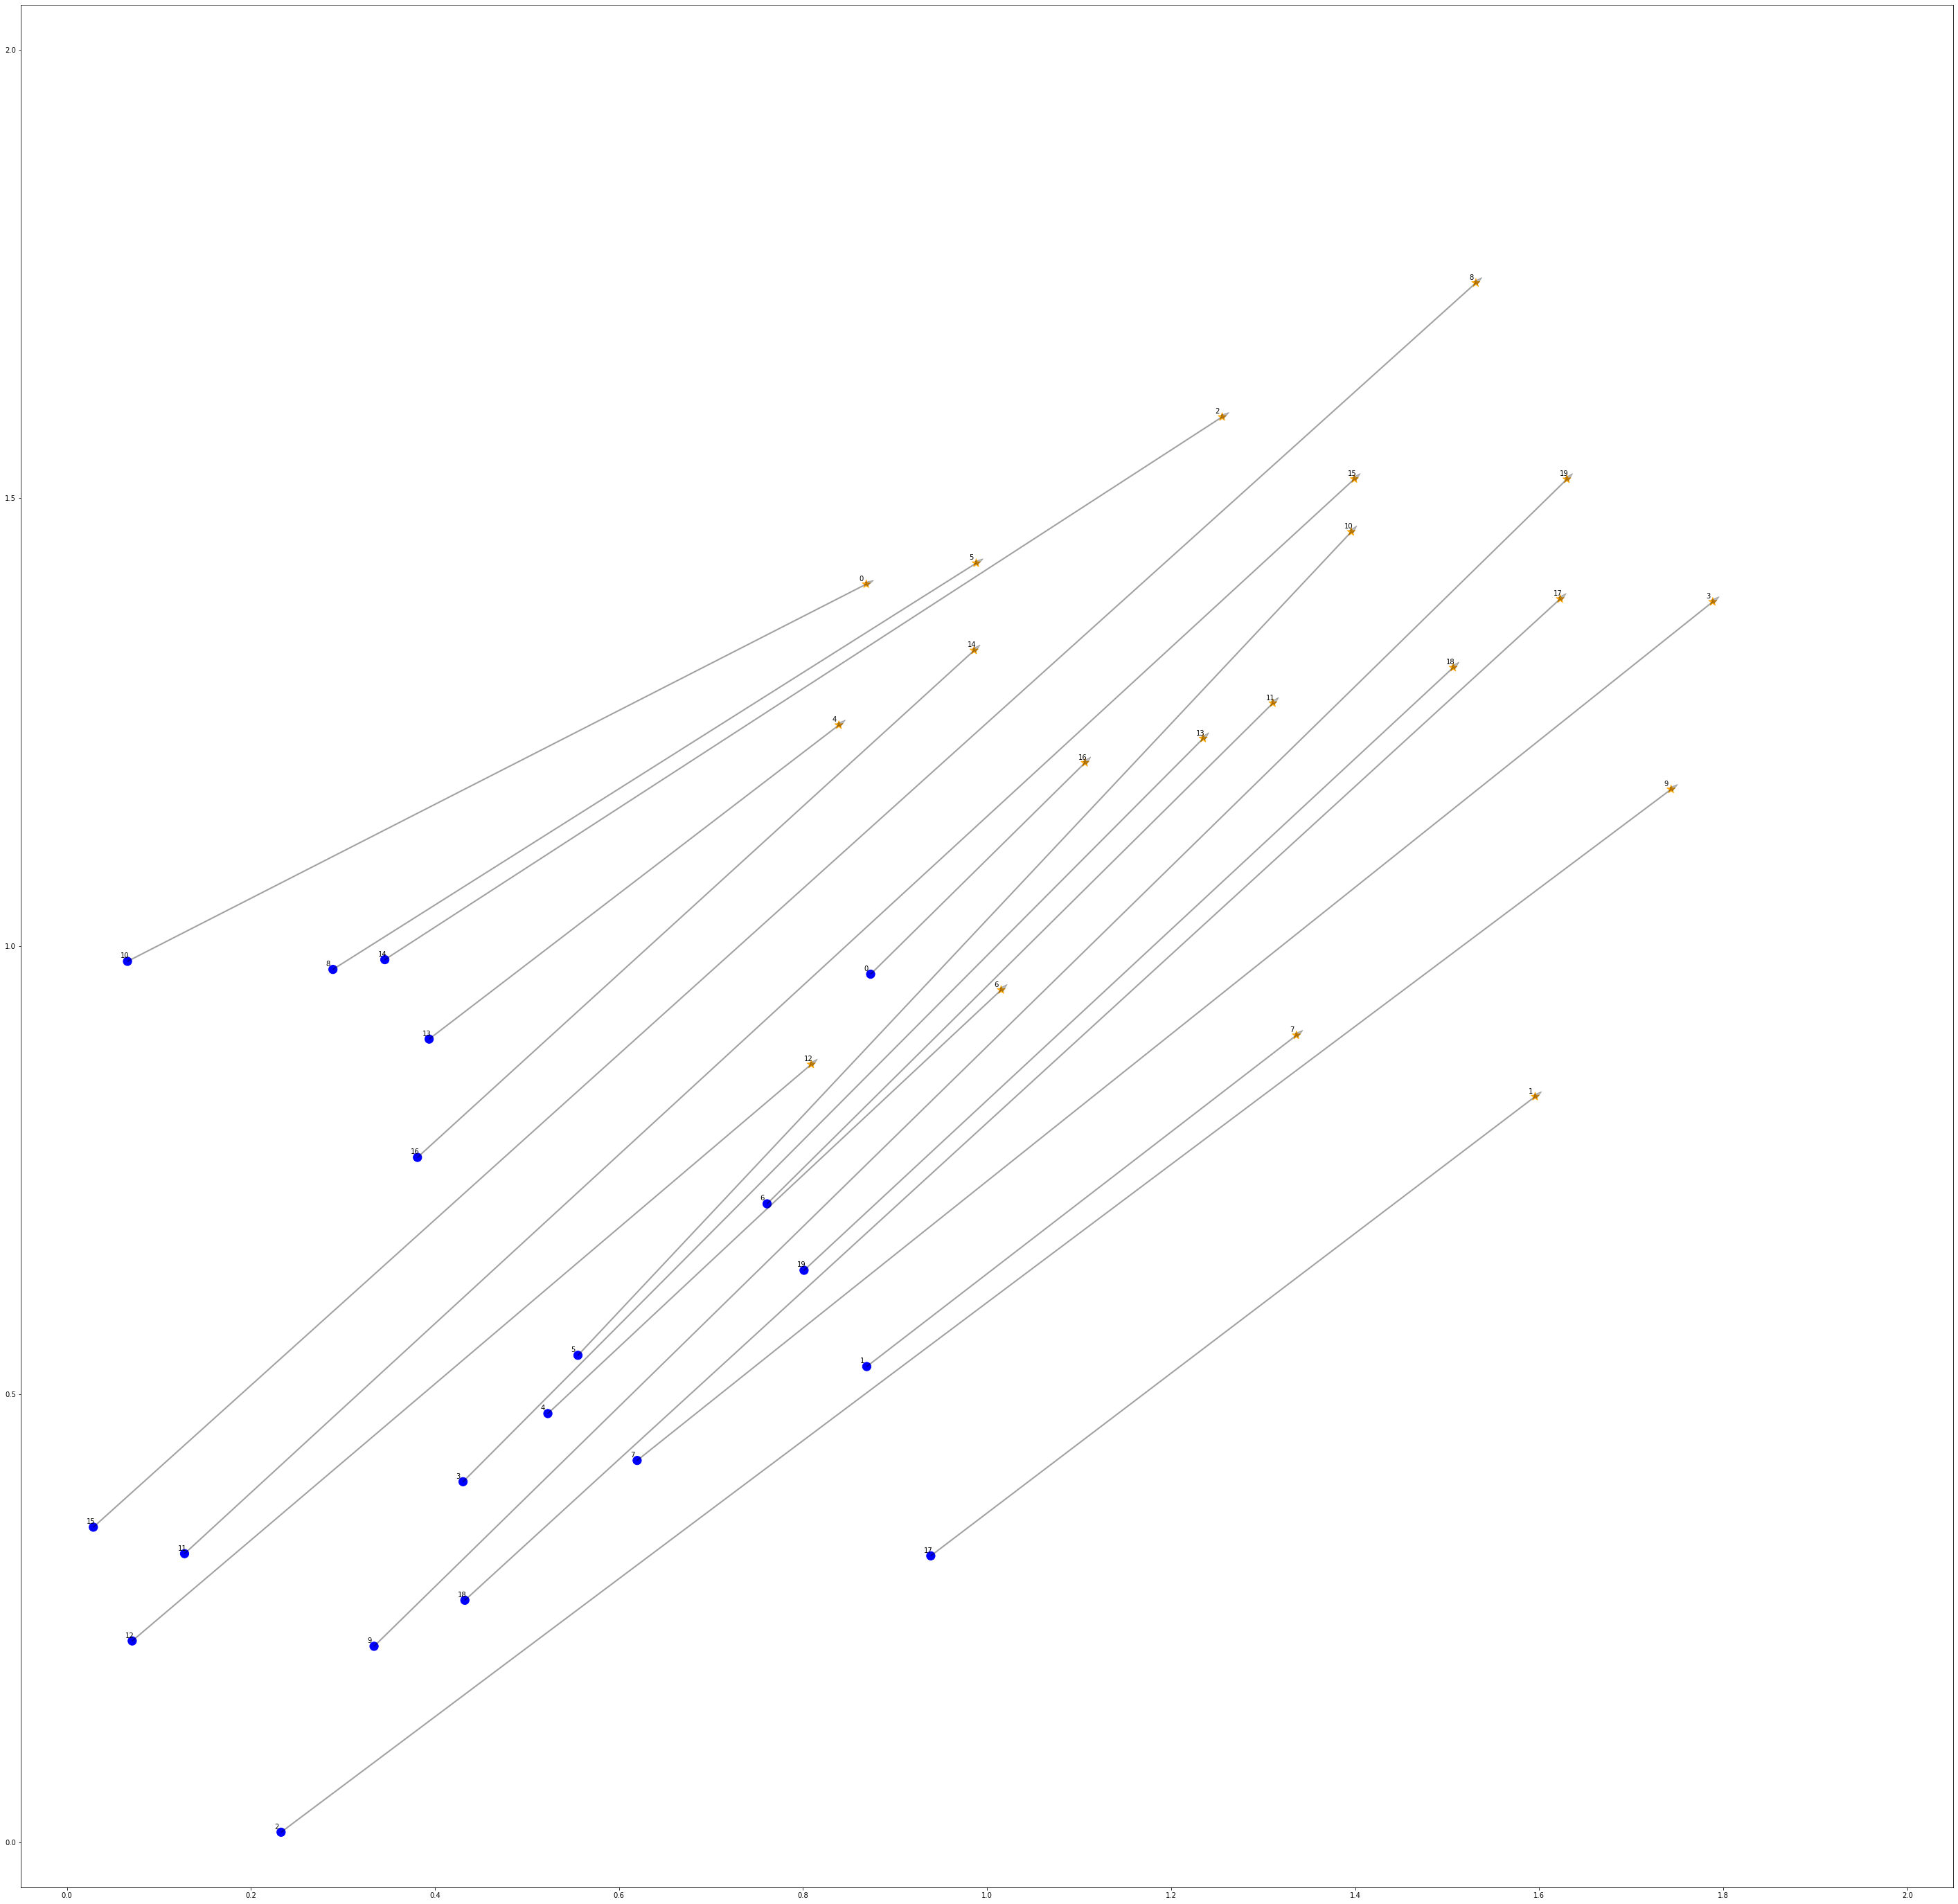

In [ ]:
plt.xlim(-0.05, 2.05)
plt.ylim(-0.05, 2.05)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
plt.yticks([0, 0.5, 1.0, 1.5, 2.0])
size_dot = 3000
size_plot = 50
plt.gcf().set_size_inches(size_plot, size_plot)
threshold = 0.01

plt.scatter(x=optimal_transport_everything1[:,0], y=optimal_transport_everything1[:,1], s=size_dot*optimal_transport_everything1[:,3], c="blue", marker='o')
plt.scatter(x=optimal_transport_everything2[:,0], y=optimal_transport_everything2[:,1], s=size_dot*optimal_transport_everything2[:,3], c="orange", marker='*')

for i in range(optimal_transport_everything1.shape[0]):
    plt.annotate(str(i), optimal_transport_everything1[i,:2], xytext =(-2 * 5, 5), textcoords ='offset points')

for i in range(optimal_transport_everything2.shape[0]):
    plt.annotate(str(i), optimal_transport_everything2[i,:2], xytext =(-2 * 5, 5), textcoords ='offset points')


arrow_starts = optimal_transport_everything1[:,:2]
arrow_ends = optimal_transport_everything2[:,:2]

#add arrows to plot
for i in range(optimal_transport_everything1.shape[0]):
  for j in range(optimal_transport_everything2.shape[0]):
    if optimal_transport_transition[i][j] >= threshold:
      plt.arrow(optimal_transport_everything1[i][0],
             optimal_transport_everything1[i][1],
             optimal_transport_everything2[j][0] - optimal_transport_everything1[i][0],
             optimal_transport_everything2[j][1] - optimal_transport_everything1[i][1],
             head_width=0.005,
             head_length=0.009,
             alpha= 5*(optimal_transport_transition[i][j]),
             fc='black',
             ec='black')

plt.show()

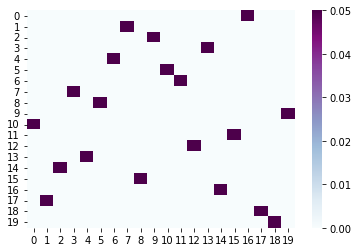

In [6]:
sns.heatmap(pd.DataFrame(res.x.reshape(n,m), columns=list(range(m))), cmap="BuPu")